In [1]:
## Importing the relevant packages 

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
## Reading the csv file downloaded from part 2 into the df that we will analyze for this part  

nba_df = pd.read_csv('/Users/krist/Downloads/nba_df_V2.csv')
nba_df.head()

,Season,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Position
0,2003,Tariq Abdul-Wahad,SG,28,DAL,14,0,14.6,1.9,4.1,...,NaN,0.2,0.2,0.4,0.104,-1.6,0.2,-1.4,0.0,SG
1,2003,Shareef Abdur-Rahim,PF,26,ATL,81,81,38.1,7.0,14.6,...,NaN,7.4,2.3,9.7,0.151,2.3,-0.7,1.6,2.8,PF
2,2003,Courtney Alexander,PG,25,NOH,66,7,20.6,2.9,7.7,...,NaN,0.1,1.0,1.1,0.040,-3.3,-1.2,-4.5,-0.9,PG
3,2003,Malik Allen,PF,24,MIA,80,73,29.0,4.2,9.9,...,NaN,-1.7,2.6,0.9,0.018,-3.9,-0.4,-4.4,-1.4,PF
4,2003,Ray Allen*,SG,27,TOT,76,75,37.9,7.9,17.9,...,NaN,7.6,1.5,9.1,0.152,4.7,-1.0,3.6,4.1,SG


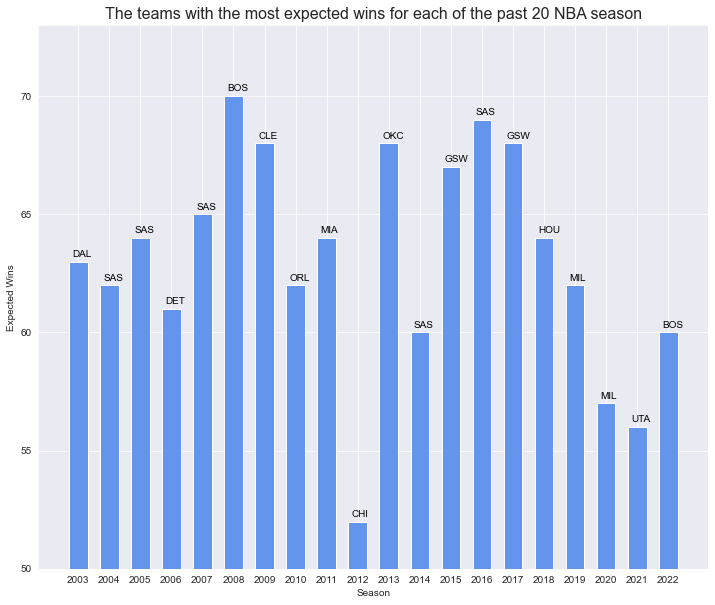

<Figure size 432x288 with 0 Axes>

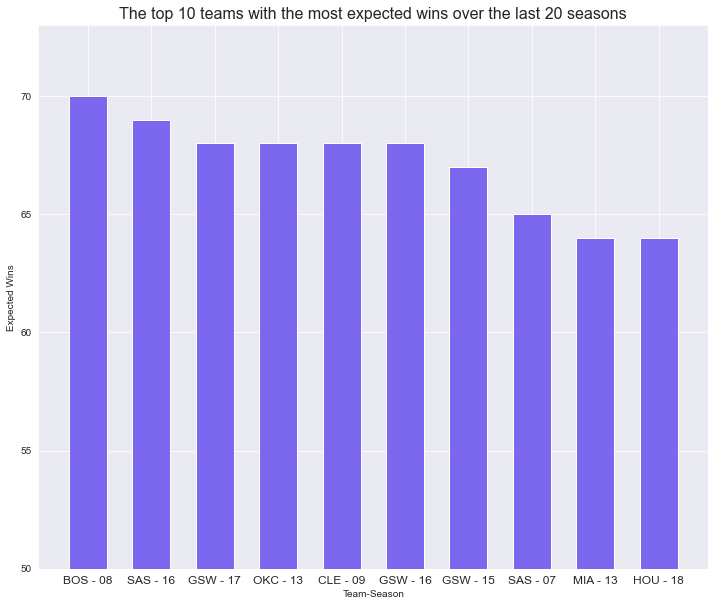

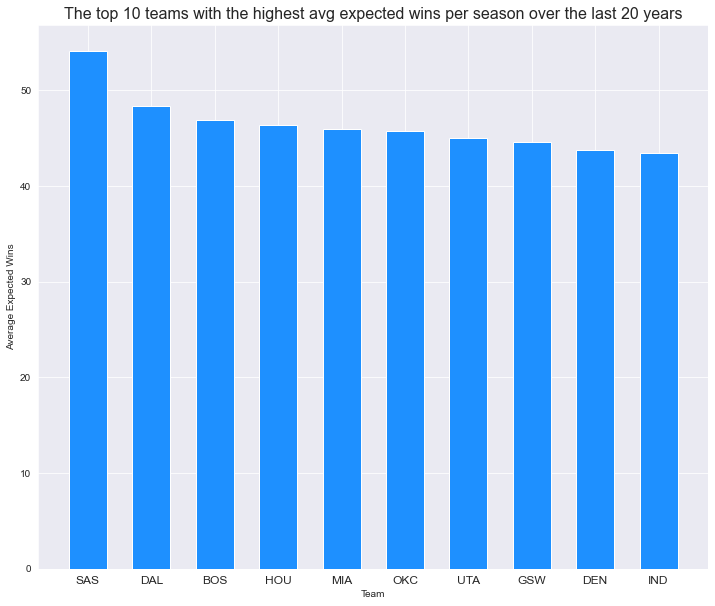

In [3]:
## Finding the team with the most expected wins for each season of the last 20 years 

# Creating a new dataframe grouping expected wins by team and season

top_teams = nba_df[nba_df['Tm'] != 'TOT'].groupby(['Season','Tm'],as_index=False)[['OWS','DWS']].sum()
top_teams['Expected Wins'] = round(top_teams['OWS']+top_teams['DWS'])

# Selecting the team with the highest expected wins for each NBA season 

top_teams_one = top_teams.loc[top_teams.groupby('Season')['Expected Wins'].idxmax()][['Season','Tm','OWS','DWS','Expected Wins']]

# Plotting the teams on a bar plot 

sns.set_style('darkgrid')
fig1 = plt.figure(figsize=(12,10))

plt.bar('Season','Expected Wins', data = top_teams_one, width = 0.6, color = 'cornflowerblue')
plt.ylim(50,73)
plt.xticks(top_teams_one['Season'])
plt.xlabel('Season')
plt.ylabel('Expected Wins')
plt.title('The teams with the most expected wins for each of the past 20 NBA season', fontsize=16)

# Coloring each datapoint by the team's color structure 

# Creating a color dictionary to assign a unique color to each team 
test_dict = {}
unique_teams = top_teams_one['Tm'].unique()
palette = sns.color_palette('husl',len(unique_teams))

for i in range(len(unique_teams)): 
    test_dict.update({unique_teams[i]:palette[i]})

for x,y,z in zip(top_teams_one['Season'], top_teams_one['Expected Wins'], top_teams_one['Tm']): 
    plt.text(x=x-0.2, y=y+0.2, s=z, color = 'black')

plt.show()
plt.clf()
    
# Plotting the top 10 teams with the most expected wins over the last 20 Seasons 
top_teams_two = top_teams.sort_values(by='Expected Wins', ascending=False)[:10]
top_teams_two['Tm-Szn'] = top_teams_two.apply(lambda x: x['Tm'] + ' - ' + str(x['Season'])[2:], axis=1)

fig2 = plt.figure(figsize=(12,10))

plt.bar('Tm-Szn','Expected Wins', data = top_teams_two, width = 0.6, color = 'mediumslateblue')
plt.ylim(50,73)
plt.xticks(top_teams_two['Tm-Szn'], fontsize=12)
plt.xlabel('Team-Season')
plt.ylabel('Expected Wins')
plt.title('The top 10 teams with the most expected wins over the last 20 seasons', fontsize=16)

    
# Ranking the top 10 teams with the highest average # of expected wins over the last 20 seasons 
top_teams_three = top_teams.groupby('Tm', as_index=False, sort=True)['Expected Wins'].mean().sort_values(by='Expected Wins',ascending=False)[:10]

fig3 = plt.figure(figsize=(12,10))

plt.bar('Tm','Expected Wins', data = top_teams_three, width = 0.6, color = 'dodgerblue')
plt.xlabel('Team')
plt.xticks(fontsize=12)
plt.ylabel('Average Expected Wins')
plt.title('The top 10 teams with the highest avg expected wins per season over the last 20 years', fontsize=16)
plt.show()


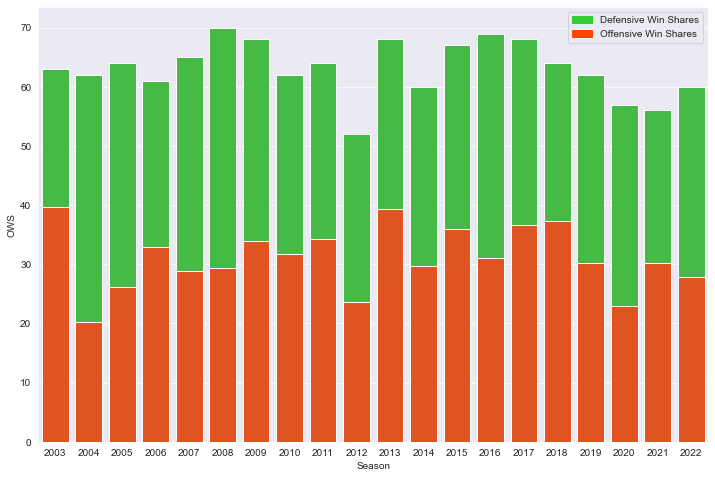

In [4]:
# Plotting OWS/DWS split of highest-winning teams per season using a stacked bar chart 
import matplotlib.patches as mpatches

plt.figure(figsize=(12, 8))

# Plotting the total expected wins to show the height of the y-axis 
bar1 = sns.barplot(x="Season",  y="Expected Wins", data=top_teams_one, color='limegreen')

# Plotting the total defensive win shares to show the bottom of the stacked bar chart 
bar2 = sns.barplot(x="Season", y="OWS", data=top_teams_one, estimator=sum, ci=None,  color='orangered')

# Plotting the legend to show offensive and defensive win shares 
top_bar = mpatches.Patch(color='limegreen', label='Defensive Win Shares')
bottom_bar = mpatches.Patch(color='orangered', label='Offensive Win Shares')
plt.legend(handles=[top_bar, bottom_bar])


In [62]:
# Finding out which teams had the biggest YoY increase in expected wins 

# Algorithm to fetch the highest-winning season for each team: 
teams = top_teams['Tm'].unique()
agg= []

for team in teams: 
    int_df = top_teams[top_teams['Tm'] == team]
    int_df['Win Delta'] = int_df['Expected Wins'] - int_df['Expected Wins'].shift(+1)
    info = int_df.loc[int_df['Win Delta'].idxmax(), ['Tm','Season','Win Delta']]
    agg.append(info)

# turn the results array into a dataframe
yoy_df = pd.DataFrame(agg)



C:\Users\krist\AppData\Local\Temp\ipykernel_10400\3703233032.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  int_df['Win Delta'] = int_df['Expected Wins'] - int_df['Expected Wins'].shift(+1)
C:\Users\krist\AppData\Local\Temp\ipykernel_10400\3703233032.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  int_df['Win Delta'] = int_df['Expected Wins'] - int_df['Expected Wins'].shift(+1)
C:\Users\krist\AppData\Local\Temp\ipykernel_10400\3703233032.py:9: SettingWithCopyWarning: 
A value is trying to be set on

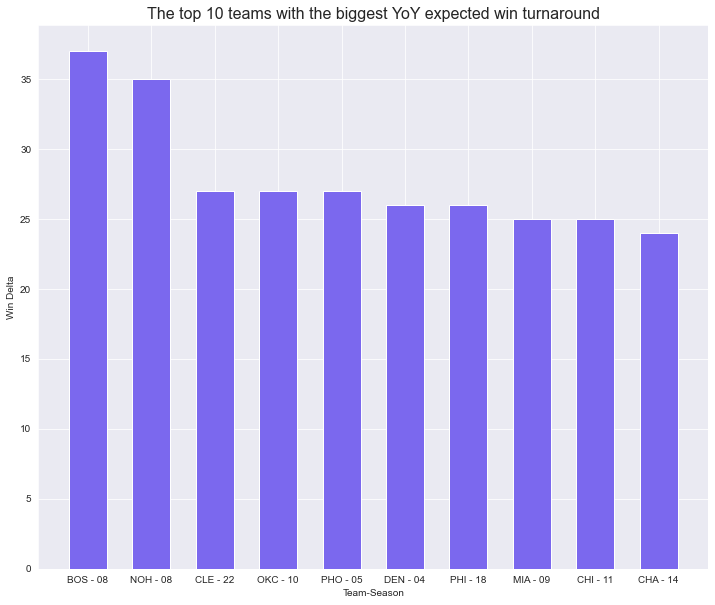

<Figure size 432x288 with 0 Axes>

In [61]:
# Graphing the results from the previous part 

# Adding a column which appends team and season, to facilitate naming the x labels later on 
yoy_df['Tm-Szn'] = yoy_df.apply(lambda x: x['Tm'] + ' - ' + str(x['Season'])[2:], axis=1)
yoy_df = yoy_df.sort_values(by='Win Delta', ascending=False)
yoy_df

# Graphing the results 
plt.figure(figsize=(12,10))

plt.bar('Tm-Szn','Win Delta', data = yoy_df[:10], width = 0.6, color = 'mediumslateblue')
plt.xlabel('Team-Season')
plt.ylabel('Win Delta')
plt.title('The top 10 teams with the biggest YoY expected win turnaround', fontsize=16)
plt.show()

plt.clf()

In [89]:
## Finding the players who had the highest 5-year PER  

players = nba_df['Player'].unique()
per_arr = []

# Looping through every player
# Getting the 5Y rolling PER average and minutes played
# Getting the associated season range 
# Filtering for players playing at least 25 minutes per game and appending the results array 

for player in players: 
    try:
        player_df = nba_df[nba_df['Player'] == player][['Player','MP','Season','PER']]
        player_df['PER 5Y avg'] = player_df['PER'].rolling(5).mean()
        player_df['MP 5Y avg'] = player_df['MP'].rolling(5).mean()
        player_df.dropna(inplace=True)
        player_df['Period'] = player_df.apply(lambda x: str(x['Season']-5)[2:] + ' - ' + str(x['Season'])[2:],axis=1)
        result = player_df.loc[player_df['PER 5Y avg'].idxmax(), ['Player','PER 5Y avg','Period','MP 5Y avg']]
        if result['MP 5Y avg'] >= 25: per_arr.append(result)
    
    except: 
        pass

# Turn the results array into a dataframe, which will be used in the visualization for the next part 
per_df = pd.DataFrame(per_arr)


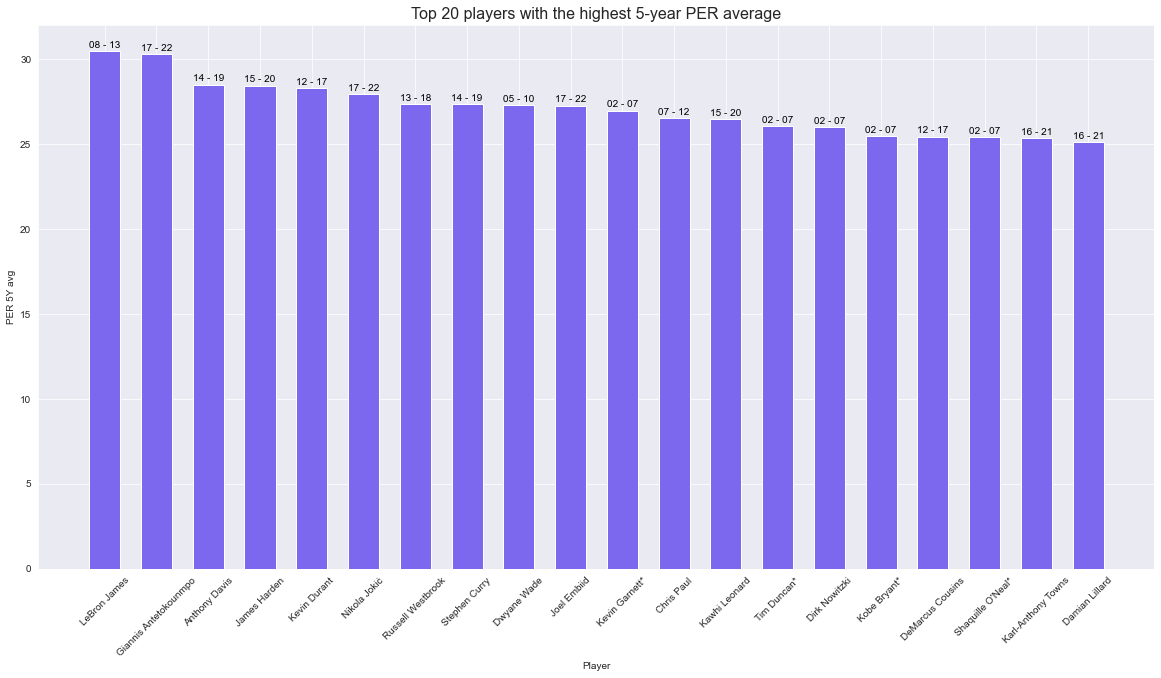

<Figure size 432x288 with 0 Axes>

In [180]:
# Visualizing the top 20 players with the best 5-year runs in terms of average PER 

# Sorting the top 100
top_20_per = per_df.sort_values(by='PER 5Y avg', ascending=False)[:20]

# Graph the results for the top 20 players with the highest 5Y 

plt.figure(figsize=(20,10))

plt.bar('Player','PER 5Y avg', data = top_20_per, width = 0.6, color = 'mediumslateblue')
plt.xlabel('Player')
plt.xticks(rotation=45)
plt.ylabel('PER 5Y avg')
plt.title('Top 20 players with the highest 5-year PER average', fontsize=16)

for x,y,z in zip(top_20_per['Player'], top_20_per['PER 5Y avg'], top_20_per['Period']): 
    plt.text(x=x, y=y+0.2, s=z, color = 'black', horizontalalignment = 'center')

plt.show()
plt.clf()


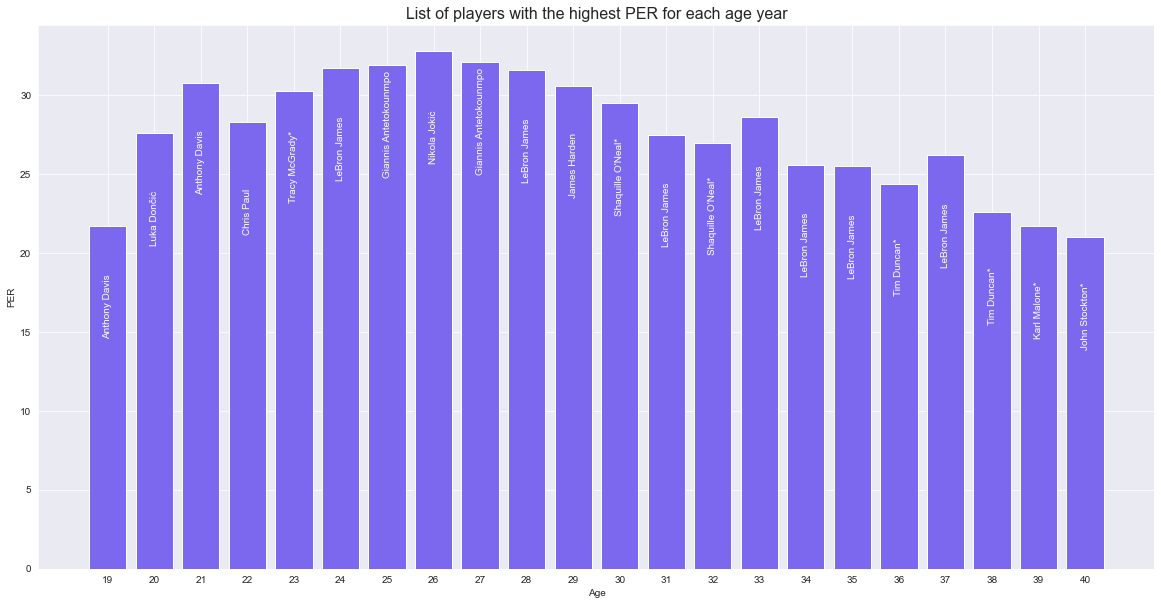

<Figure size 432x288 with 0 Axes>

In [196]:
# Which player had the most productive season for each age ?  

age_array = []
age_list = nba_df[(nba_df['MP']>=25) & (nba_df['G']>=50)]['Age'].unique()
age_list.sort()

for age in age_list: 
    try:
        age_test = nba_df[(nba_df['Age']==age) & (nba_df['MP']>=25) & (nba_df['G']>=50)]
        result = age_test.loc[age_test['PER'].idxmax(),['Player','Age','PER']]
        age_array.append(result)
    except: pass

age_df = pd.DataFrame(age_array)
age_df

# Graphing the results 

plt.figure(figsize=(20,10))

plt.bar('Age','PER', data = age_df, width = 0.8, color = 'mediumslateblue')
plt.xlabel('Age')
plt.xticks(ticks = age_list)
#plt.xticks(rotation=45)
plt.ylabel('PER')
plt.title('List of players with the highest PER for each age year', fontsize=16)

for x,y,z in zip(age_df['Age'], age_df['PER'], age_df['Player']): 
    plt.text(x=x, y=y-7, s=z, color = 'white', size= 'medium' , horizontalalignment='center', rotation = 'vertical')

plt.show()
plt.clf()


C:\Users\krist\AppData\Local\Temp\ipykernel_10400\3375609855.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nba_test['PER Rank'] = nba_test.groupby('Season')['PER'].rank(method='first', ascending=False)


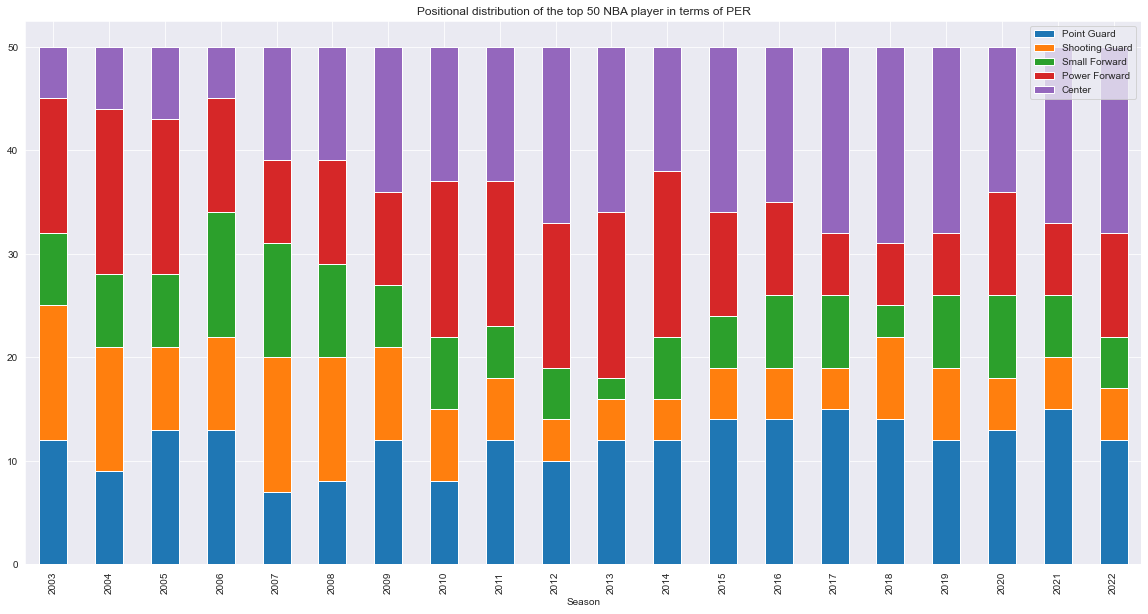

In [398]:
# Positional breakdown of the league's top 50 players (measuring PER) using a stacked bar chart 

# Filter the nba dataframe for the top 50 players each season 
nba_test = nba_df[(nba_df['MP']>=25) & (nba_df['G']>=40)]
nba_test['PER Rank'] = nba_test.groupby('Season')['PER'].rank(method='first', ascending=False)
nba_test = nba_test[nba_test['PER Rank'] <= 50]

# Find position counts for each season 
test_two = nba_test.groupby('Season')['Position'].value_counts()
test_df = pd.DataFrame(test_two)
test_df = test_df.rename(columns={'Position':'Count'})
test_df = test_df.reset_index()
test_df

# Build the stacked chart 
PG = test_df[test_df['Position'] == 'PG']
PG= PG.rename(columns={'Count':'Point Guard'}).drop('Position', axis=1)

SG = test_df[test_df['Position'] == 'SG']
SG= SG.rename(columns={'Count':'Shooting Guard'}).drop('Position', axis=1)

SF = test_df[test_df['Position'] == 'SF']
SF= SF.rename(columns={'Count':'Small Forward'}).drop('Position', axis=1)

PF = test_df[test_df['Position'] == 'PF']
PF= PF.rename(columns={'Count':'Power Forward'}).drop('Position', axis=1)

C = test_df[test_df['Position'] == 'C']
C= C.rename(columns={'Count':'Center'}).drop('Position', axis=1)

final = pd.merge(PG, SG)
final = pd.merge(final, SF)
final = pd.merge(final, PF)
final = pd.merge(final, C)


final.plot(x='Season', kind='bar', figsize = (20,10) ,stacked=True,
        title='Positional distribution of the top 50 NBA player in terms of PER')
plt.show()
